## Import Statements

In [2]:
import pandas as pd 
import numpy as np
import os
import glob   
import gc
import time 
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


## Global Variables

In [5]:
_PickleFilesFolder="data"
_PickleFile_Merged_Listing_NY="Merged_Listing_NY"
_PickleFile_Vectorized_Data="NY_Vectors"


# Helper Methods

# Load Data

In [6]:
X_test=pd.DataFrame(np.load(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_" + "X_test_Final_Features.npz")["arr_0"])

In [7]:
X_train=pd.DataFrame(np.load(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_" + "X_train_Final_Features.npz")["arr_0"])

In [8]:
X_train.shape

(25830, 5129)

In [9]:
y_train=pd.DataFrame( np.load( _PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_c_" + "y_train.npz")["arr_0"])

In [10]:
y_train.shape

(25830, 1)

# Principal-Components-Regression-

In [8]:
#https://www.statology.org/principal-components-regression-in-python/

#https://stackoverflow.com/questions/52311416/principle-component-regression-using-python

#https://nirpyresearch.com/principal-component-regression-python/

In [9]:
#scale predictor variables
pcr = PCA()
x_train_pcr = pcr.fit_transform(scale(X_train))

#define cross validation method
cvr = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

lr_reg = LinearRegression(n_jobs=-1)
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(lr_reg,
           np.ones((len(x_train_pcr),1)), y_train, cv=cvr,
           scoring='neg_mean_squared_error',n_jobs=-1,verbose=2).mean()    
mse.append(score)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.5s finished


In [11]:
score

79201.40672319276

In [12]:
# Calculate MSE using cross-validation, adding one component at a time
components_list=[10,50,100,200,500,700,1000,1300,1800,2000,2500,3000,3500,4000,5000]
for i in components_list:
   
    score = -1*model_selection.cross_val_score(lr_reg,
               x_train_pcr[:,:i], y_train, cv=cvr, scoring='neg_mean_squared_error',n_jobs=-1,verbose=0).mean()
    print("Componets : ",i, " Error: " ,score)
    mse.append(score)
    


Componets :  10  Error:  17762.18492004741
Componets :  50  Error:  12268.5603774313
Componets :  100  Error:  12232.078383443726
Componets :  200  Error:  12161.698152954137
Componets :  500  Error:  11655.024214538706
Componets :  700  Error:  11296.39296396156
Componets :  1000  Error:  10908.524929214273
Componets :  1300  Error:  10735.675850152977
Componets :  1800  Error:  10591.389214017454
Componets :  2000  Error:  10525.271137454934
Componets :  2500  Error:  10336.273191101998
Componets :  3000  Error:  10074.982787581825
Componets :  3500  Error:  9494.912013223162
Componets :  4000  Error:  8193.336967353436
Componets :  5000  Error:  1.1243680397586653e+27


Text(0.5, 1.0, 'hp')

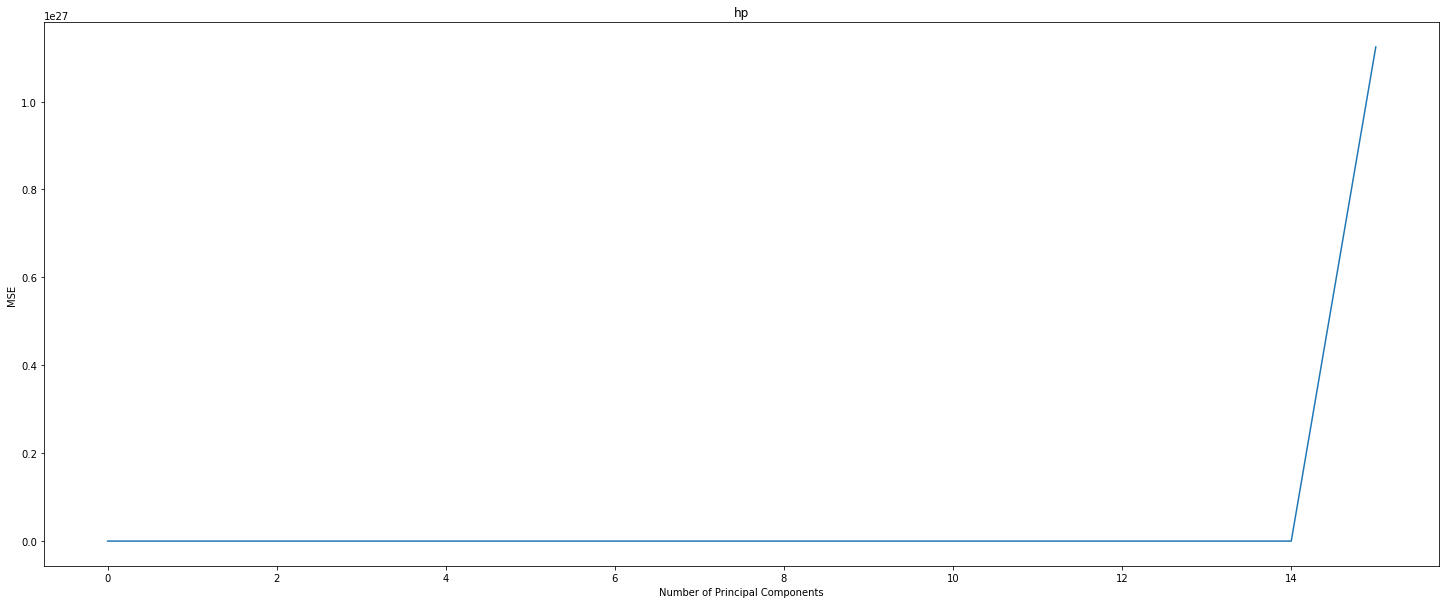

In [13]:
# Plot cross-validation results 
plt.figure(figsize=(25,10))
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [31]:
mse_log = []
import math
i=1
for i in range(1, len(mse)):
    mse_log.append(math.log(i))



Text(0.5, 1.0, 'hp')

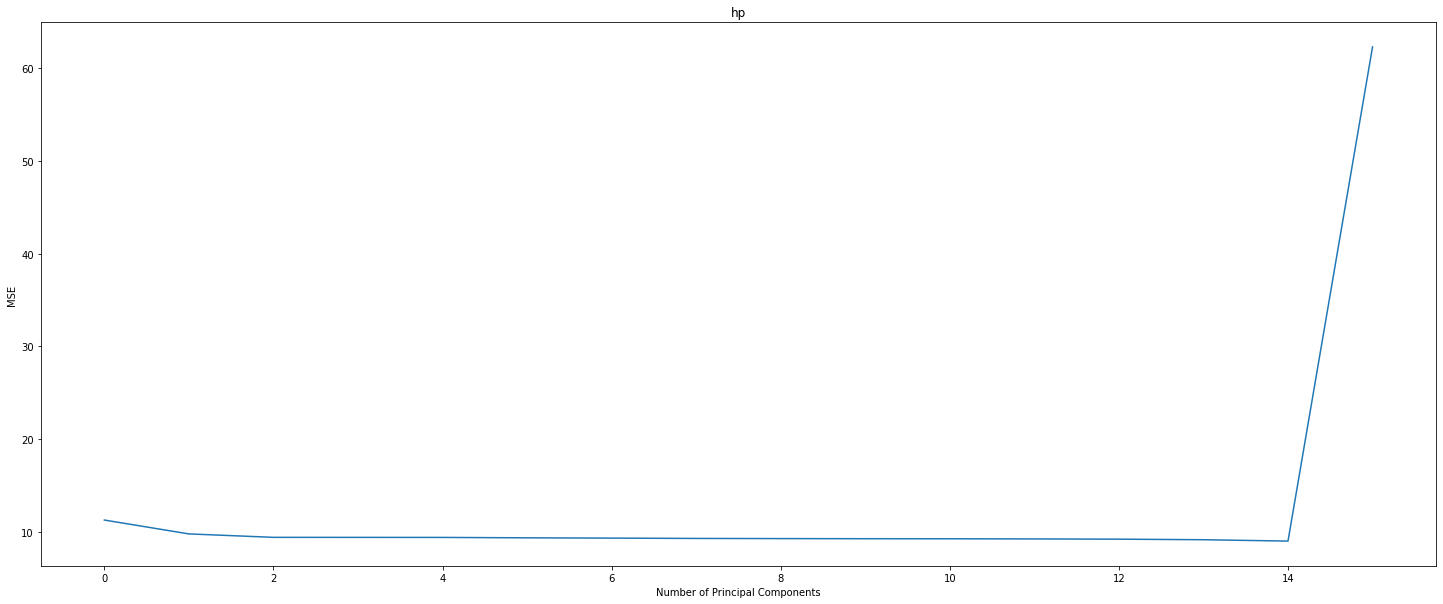

In [27]:
# Plot cross-validation results 
plt.figure(figsize=(25,10))
plt.plot(mse_log)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [32]:
len(mse_log)

15

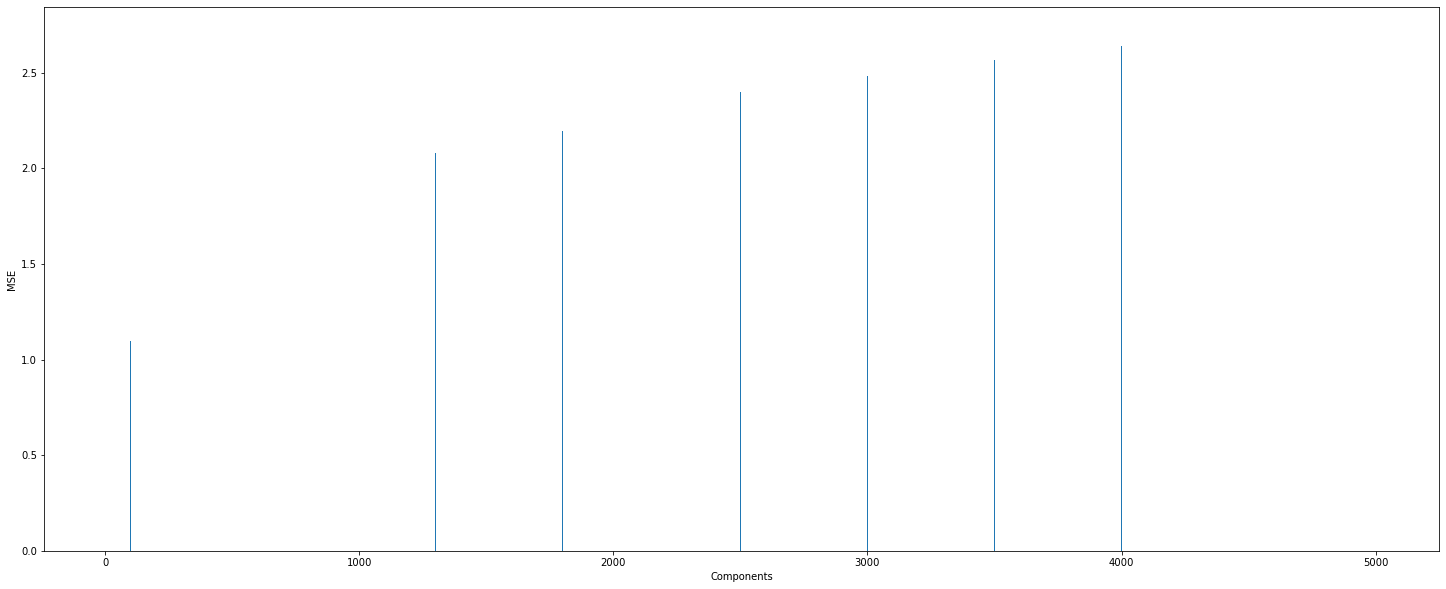

In [55]:
# plot the scores
# Plot the scores for the features
plt.figure(figsize=(25,10))
plt.bar([ components_list[i] for i in range(len(components_list))], height=mse_log)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.show()

In [40]:
df=pd.DataFrame( np.cumsum(np.round(pcr.explained_variance_ratio_, decimals=4)*100))


In [47]:
import pandas
pandas.set_option('display.max_rows', None)

df

,0
0,2.08
1,4.03
2,5.10
3,6.03
4,6.93
5,7.80
6,8.65
7,9.46
8,10.21
9,10.75


In [ ]:
#Taking componets 2500 with Varince of 85%

In [11]:
pcr = PCA()
X_reduced_train = pcr.fit_transform(scale(X_train))[:,:2500]
X_reduced_test = pcr.transform(scale(X_test))[:,:2500]



In [13]:
X_reduced_test.shape

(11070, 2500)

In [12]:
X_reduced_train.shape

(25830, 2500)

In [31]:
#np.savez_compressed(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_" + "X_test_Final_Features",X_test_Final)
#np.savez_compressed(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_" + "X_train_Final_Features",X_train_Final)

In [14]:
np.savez_compressed(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_" + "X_test_Final_2",X_reduced_test)
np.savez_compressed(_PickleFilesFolder + "/" + _PickleFile_Merged_Listing_NY + "_" + "X_train_Final_2",X_reduced_train)